Import Library

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [2]:
import pandas as pd
import numpy as np
import collections
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

In [3]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

from sklearn.metrics import f1_score

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

Preprocessing

In [4]:
dataset = pd.read_csv('data12.csv').head(301)

In [15]:
data = dataset.drop('type', axis= 1)

In [16]:
data

,latitude,longitude,bright_ti4,scan,track
0,-2.78686,120.37390,325.5,0.57,0.52
1,-0.82440,127.86865,332.6,0.39,0.36
2,-1.43265,132.32120,333.3,0.57,0.43
3,0.90354,127.62830,337.7,0.39,0.36
4,-0.86484,122.20721,329.5,0.40,0.44
5,-0.33577,128.01337,331.2,0.39,0.36
6,0.55568,121.89539,334.5,0.40,0.44
7,0.52534,121.49609,340.5,0.42,0.46
8,0.52593,121.49989,341.7,0.42,0.46
9,3.08473,117.41190,340.7,0.37,0.58


Quartil

In [7]:
latitude_quartil = [-5.805215, -2.58092, -1.00659]
longitude_quartil = [115.507875, 121.37401, 127.423745]
bright_quartil = [312.75, 330.5, 337.65]
scan_quartil = [0.39, 0.42, 0.49]
track_quartil = [0.37, 0.43, 0.545]
# change_q = [latitude, longitude_quartil, bright_quartil, scan_quartil, track_quartil]

In [8]:
latitude = np.asarray(data['latitude'])
longitude = np.asarray(data['longitude'])
bright = np.asarray(data['bright_ti4'])
scan = np.asarray(data['scan'])
track = np.asarray(data['track'])

In [9]:
def change_quartil(temp_v, value):
  # value = latitude
  # temp_v = latitude_quartil
  for i, val in enumerate(value):
    if val >= temp_v[2]:
      value[i] = int(3)
    elif (val < temp_v[2]) and (val >= temp_v[1]):
      value[i] = int(2)
    elif (val < temp_v[1]) and (val >= temp_v[0]):
      value[i] = int(1)
    elif (val < temp_v[0]):
      value[i] = int(0)
  return value

In [10]:
results_lat = change_quartil(latitude_quartil, latitude)
results_lon = change_quartil(longitude_quartil, longitude)
result_bright = change_quartil(bright_quartil, bright)
result_scan = change_quartil(scan_quartil, scan)
result_track = change_quartil(track_quartil, track)

In [11]:
preprocess_data = pd.DataFrame()
preprocess_data['latitude'] = results_lat
preprocess_data['longitude'] = results_lon
preprocess_data['bright_ti4'] = result_bright
preprocess_data['scan'] = result_scan
preprocess_data['track'] = result_track

In [12]:
preprocess_data

,latitude,longitude,bright_ti4,scan,track
0,1.0,1.0,1.0,3.0,2.0
1,3.0,3.0,2.0,1.0,0.0
2,2.0,3.0,2.0,3.0,2.0
3,3.0,3.0,3.0,1.0,0.0
4,3.0,2.0,1.0,1.0,2.0
5,3.0,3.0,2.0,1.0,0.0
6,3.0,2.0,2.0,1.0,2.0
7,3.0,2.0,3.0,2.0,2.0
8,3.0,2.0,3.0,2.0,2.0
9,3.0,1.0,3.0,0.0,3.0


Split Data

In [17]:
features = data
label = dataset['type']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33) # 70% training and 30% test

Klasifikasi

Naive Bayes

In [19]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_NB = gnb.predict(X_test)
y_pred_NB

array([0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 3, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2])

ID3

In [20]:
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(X_train,y_train)
y_pred_ID3 = model_dt.predict(X_test)

In [36]:
y_pred_ID3

array([0, 0, 1, 1, 2, 1, 2, 0, 3, 2, 0, 0, 2, 2, 3, 0, 3, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 3, 0, 0, 2, 0, 3,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 3, 1, 0, 1, 2, 0, 3, 3, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 0, 1, 1, 3, 1, 1, 0, 3, 2])

Akurasi

NB

In [37]:
y_true = y_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix :
[[47  4  2  1]
 [ 7 10  0  0]
 [10  1  4  0]
 [ 5  5  2  1]]
Accuracy Score : 0.6262626262626263
Report : 
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        54
           1       0.50      0.59      0.54        17
           2       0.50      0.27      0.35        15
           3       0.50      0.08      0.13        13

   micro avg       0.63      0.63      0.63        99
   macro avg       0.55      0.45      0.45        99
weighted avg       0.60      0.63      0.58        99



ID3

In [38]:
y_true = y_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[46  5  2  1]
 [ 0 17  0  0]
 [ 0  0 14  1]
 [ 3  0  2  8]]
Accuracy Score : 0.8585858585858586
Report : 
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        54
           1       0.77      1.00      0.87        17
           2       0.78      0.93      0.85        15
           3       0.80      0.62      0.70        13

   micro avg       0.86      0.86      0.86        99
   macro avg       0.82      0.85      0.83        99
weighted avg       0.87      0.86      0.86        99



In [39]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import SVG, display
from graphviz import Source

In [40]:
attr = features.columns

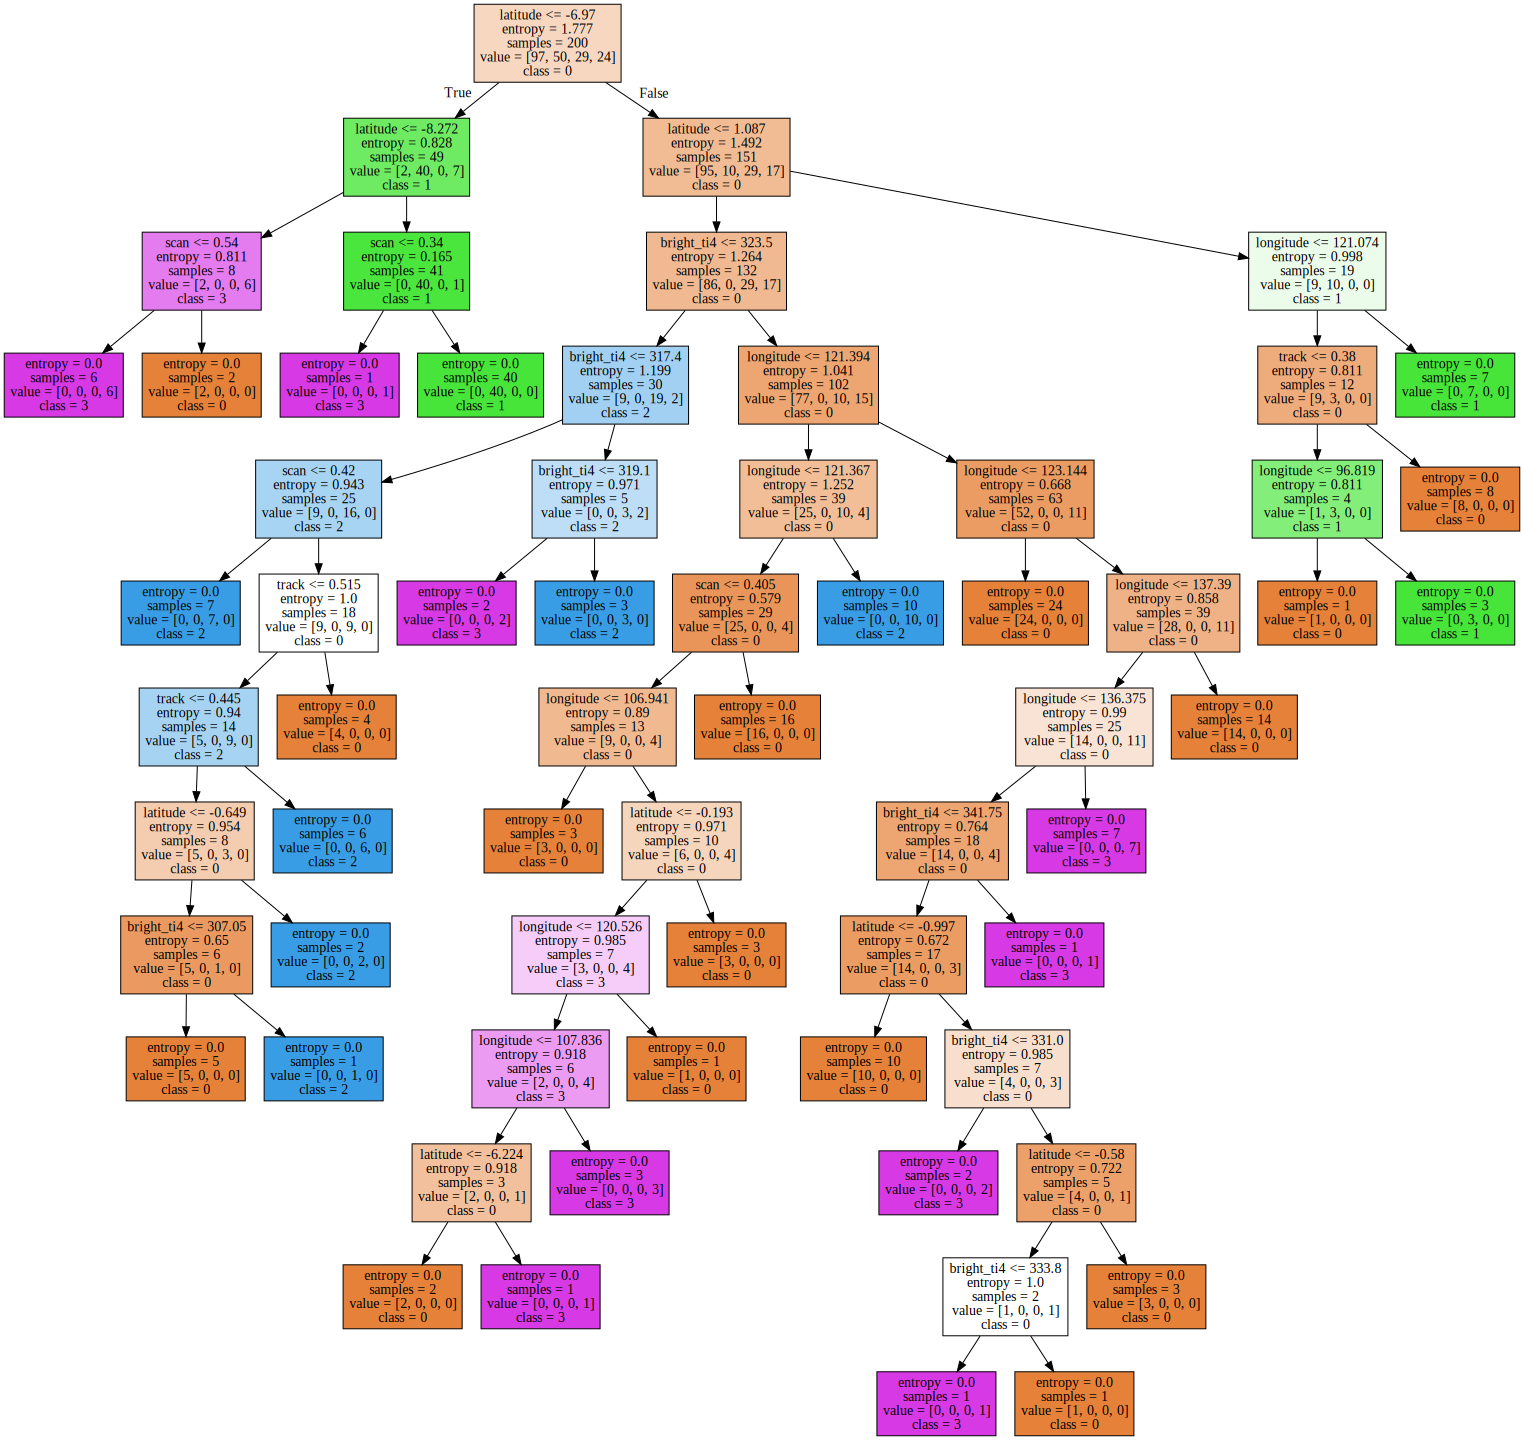

In [41]:
graph = Source(tree.export_graphviz(model_dt,
out_file = None, feature_names = attr 
                , class_names = ['0', '1', '2', '3']
                , filled = True))

display(SVG(graph.pipe(format='svg')))

Perbandingan Hasil Akurasi

In [43]:
result_class = pd.DataFrame({
    'Hasil Sebenarnya': y_true,
    'Naive Bayes': y_pred_NB,
    'ID3' : y_pred_ID3
})

result_class

,Hasil Sebenarnya,Naive Bayes,ID3
75,0,0,0
214,0,0,0
22,1,1,1
29,1,1,1
156,2,2,2
18,1,0,1
85,2,0,2
258,0,0,0
186,3,0,3
146,0,2,2


In [44]:
result_class['Naive Bayes'].value_counts()

0    69
1    20
2     8
3     2
Name: Naive Bayes, dtype: int64

In [45]:
result_class['ID3'].value_counts()

0    49
1    22
2    18
3    10
Name: ID3, dtype: int64

In [46]:
result_class['Hasil Sebenarnya'].value_counts()

0    54
1    17
2    15
3    13
Name: Hasil Sebenarnya, dtype: int64

Mengubah data menjadi Numpy

In [47]:
import numpy as np
x = np.asarray(data.head(301))
x

array([[ -2.78686, 120.3739 , 325.5    ,   0.57   ,   0.52   ],
       [ -0.8244 , 127.86865, 332.6    ,   0.39   ,   0.36   ],
       [ -1.43265, 132.3212 , 333.3    ,   0.57   ,   0.43   ],
       ...,
       [ -3.84077, 137.87   , 332.1    ,   0.41   ,   0.37   ],
       [ -3.68836, 138.01994, 332.7    ,   0.42   ,   0.38   ],
       [ -4.24486, 139.09668, 331.     ,   0.46   ,   0.39   ]])

In [129]:
len(x)

299

In [126]:
import numpy as np
y = np.asarray(preprocess_data)
# y

Clusterring menggunakan K-Means

In [48]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
labels = kmeans.predict(x)
centroids = kmeans.cluster_centers_

In [49]:
kmeans_label = pd.DataFrame(labels)

Clusterring menggunakan AGNES

In [50]:
clustering = AgglomerativeClustering().fit(x)
clustering 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [51]:
AGNES_labels = pd.DataFrame(clustering.labels_)

In [52]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(x)

In [124]:
dendrogram

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [75.0, 75.0, 101.25, 101.25],
  [65.0, 65.0, 88.125, 88.125],
  [55.0, 55.0, 76.5625, 76.5625],
  [14.375, 14.375, 65.78125, 65.78125],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [183.75, 183.75, 237.5, 237.5],
  [143.75, 143.75, 210.625, 210.625],
  [275.0, 275.0, 285.0, 285.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [280.0, 280.0, 303.75, 303.75],
  [345.0, 345.0, 355.0, 355.0],


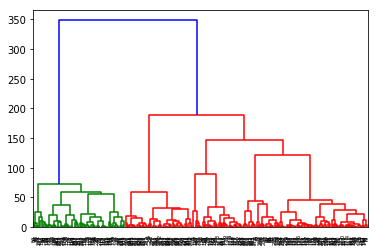

In [128]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [127]:
from IPython.display import Image
# Image(filename='Screen Shot 2019-11-13 at 09.15.29.png')

In [53]:
y_hc

array([0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2])

Perbandingan Hasil 3 metode clustering

In [56]:
fix_data = pd.DataFrame()

In [57]:
fix_data['Kelas'] = dataset['type']
fix_data['K-Means'] = kmeans_label
fix_data['AGNES'] = AGNES_labels
# fix_data['DBSCAN'] = DBSCAN_labels


In [58]:
fix_data

,Kelas,K-Means,AGNES
0,0,1,0
1,3,2,0
2,0,2,0
3,0,2,0
4,0,1,0
5,0,2,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,1,0


In [59]:
fix_data['K-Means'].value_counts()

1    147
0     86
2     66
Name: K-Means, dtype: int64

In [60]:
fix_data['AGNES'].value_counts()

0    217
1     82
Name: AGNES, dtype: int64

In [62]:
# fix_data['DBSCAN'].value_counts()

Menghitung SSE

Membuat Matrix Similiarity

In [63]:
data

,latitude,longitude,bright_ti4,scan,track
0,-2.78686,120.37390,325.5,0.57,0.52
1,-0.82440,127.86865,332.6,0.39,0.36
2,-1.43265,132.32120,333.3,0.57,0.43
3,0.90354,127.62830,337.7,0.39,0.36
4,-0.86484,122.20721,329.5,0.40,0.44
5,-0.33577,128.01337,331.2,0.39,0.36
6,0.55568,121.89539,334.5,0.40,0.44
7,0.52534,121.49609,340.5,0.42,0.46
8,0.52593,121.49989,341.7,0.42,0.46
9,3.08473,117.41190,340.7,0.37,0.58


Matrix Distance

In [64]:
import pandas as pd
from scipy.spatial import distance_matrix

datam = np.asarray(data)
df = pd.DataFrame(datam)

In [65]:
 matrix_distance = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

In [66]:
matrix_distance['Kelas'] = kmeans_label

In [67]:
matrix_distance

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,Kelas
0,0.000000,10.511447,14.332479,14.667766,4.805256,9.844661,9.722284,15.403119,16.574334,16.562989,...,6.189614,8.043346,10.162091,30.610805,34.463515,24.132282,18.730519,19.080816,19.569038,1
1,10.511447,0.000000,4.552194,5.390134,6.455233,1.489867,6.418797,10.239737,11.189522,13.794336,...,12.293397,11.552475,19.366788,38.928632,44.229324,14.607892,10.458298,10.548093,11.846265,2
2,14.332479,4.552194,0.000000,6.846780,10.820545,4.920147,10.682695,13.148389,13.839082,17.248665,...,15.728894,15.011904,22.067853,40.712751,48.124561,10.686955,6.169070,6.160265,7.688911,2
3,14.667766,5.390134,6.846780,0.000000,9.988087,6.628285,6.575239,6.752624,7.328772,10.871119,...,15.694201,14.036917,24.176363,44.104309,47.389371,13.811893,12.600055,12.412616,14.245194,2
4,4.805256,6.455233,10.820545,9.988087,0.000000,6.073542,5.207217,11.110315,12.299404,12.808380,...,8.080308,8.177953,14.826905,35.019530,38.052548,20.775972,16.153766,16.378605,17.289732,1
5,9.844661,1.489867,4.920147,6.628285,6.073542,0.000000,7.008628,11.389352,12.386640,14.642055,...,12.279185,11.907701,18.530051,37.725955,43.358974,15.412478,10.499937,10.659390,11.754427,2
6,9.722284,6.418797,10.682695,6.575239,5.207217,7.008628,0.000000,6.013415,7.210971,8.059670,...,11.148041,9.740607,19.769380,40.166737,41.247419,19.482315,16.741623,16.770718,18.198507,1
7,15.403119,10.239737,13.148389,6.752624,11.110315,11.389352,6.013415,0.000000,1.200006,4.825763,...,15.272716,12.909638,25.183493,45.999484,45.713563,19.094418,18.913911,18.752048,20.561908,1
8,16.574334,11.189522,13.839082,7.328772,12.299404,12.386640,7.210971,1.200006,0.000000,4.927070,...,16.255602,13.791573,26.307357,47.176914,46.694792,19.166310,19.473489,19.278970,21.140103,1
9,16.562989,13.794336,17.248665,10.871119,12.808380,14.642055,8.059670,4.825763,4.927070,0.000000,...,16.920669,14.782346,26.301594,46.714293,43.453906,23.824407,23.248701,23.121604,24.861351,1


SSE

K MEANS

In [68]:
try_x = pd.DataFrame(kmeans_label)
data_x = data
data_x['k_means'] = try_x
data_x 

,latitude,longitude,bright_ti4,scan,track,k_means
0,-2.78686,120.37390,325.5,0.57,0.52,1
1,-0.82440,127.86865,332.6,0.39,0.36,2
2,-1.43265,132.32120,333.3,0.57,0.43,2
3,0.90354,127.62830,337.7,0.39,0.36,2
4,-0.86484,122.20721,329.5,0.40,0.44,1
5,-0.33577,128.01337,331.2,0.39,0.36,2
6,0.55568,121.89539,334.5,0.40,0.44,1
7,0.52534,121.49609,340.5,0.42,0.46,1
8,0.52593,121.49989,341.7,0.42,0.46,1
9,3.08473,117.41190,340.7,0.37,0.58,1


In [69]:
value_count = dict(data_x['k_means'].value_counts())
value_count

{1: 147, 0: 86, 2: 66}

In [70]:
value_count[0]

86

In [71]:
data_1 = data_x.sort_values(by=['k_means'])

In [72]:
try_data_x = np.asarray(data_1)
try_data_x

array([[ -8.19771, 119.07119, 317.6    ,   0.43   ,   0.62   ,   0.     ],
       [ -1.1422 , 103.46057, 311.5    ,   0.57   ,   0.52   ,   0.     ],
       [ -8.20192, 119.08123, 301.     ,   0.39   ,   0.36   ,   0.     ],
       ...,
       [ -1.33469, 133.68454, 338.1    ,   0.6    ,   0.53   ,   2.     ],
       [ -3.68836, 138.01994, 332.7    ,   0.42   ,   0.38   ,   2.     ],
       [ -4.24486, 139.09668, 331.     ,   0.46   ,   0.39   ,   2.     ]])

In [73]:
len(try_data_x)

299

In [74]:
np.savetxt('coba2.csv',try_data_x, delimiter=',')

In [75]:
new_data_0 = data_1[:value_count[0]]
new_data_1= data_1[value_count[0]:value_count[0] + value_count[1]]
new_data_2 = data_1[value_count[0] + value_count[1]:value_count[0] + value_count[1]+ value_count[2]]

In [76]:
new_data_2

,latitude,longitude,bright_ti4,scan,track,k_means
258,-0.78838,133.78889,339.4,0.47,0.40,2
257,-2.66314,140.45386,333.7,0.39,0.59,2
260,-1.25824,133.81004,333.9,0.46,0.39,2
255,-3.95650,138.94777,342.2,0.59,0.53,2
296,-3.84077,137.87000,332.1,0.41,0.37,2
259,-0.99740,134.02788,329.2,0.48,0.40,2
23,1.49221,127.63698,326.6,0.45,0.63,2
19,1.49305,127.63482,329.7,0.45,0.63,2
5,-0.33577,128.01337,331.2,0.39,0.36,2
261,-0.99674,134.03220,329.6,0.48,0.40,2


In [77]:
mean_latitude_0 = np.sum(new_data_0['latitude'])/len(new_data_0)
mean_latitude_1 = np.sum(new_data_1['latitude'])/len(new_data_1)
mean_latitude_2 = np.sum(new_data_2['latitude'])/len(new_data_2)

In [78]:
mean_long_0 = np.sum(new_data_0['longitude'])/len(new_data_0)
mean_long_1 = np.sum(new_data_1['longitude'])/len(new_data_1)
mean_long_2 = np.sum(new_data_2['longitude'])/len(new_data_2)

In [79]:
mean_bright_0 = np.sum(new_data_0['bright_ti4'])/len(new_data_0)
mean_bright_1 = np.sum(new_data_1['bright_ti4'])/len(new_data_1)
mean_bright_2 = np.sum(new_data_2['bright_ti4'])/len(new_data_2)

In [80]:
mean_scan_0 = np.sum(new_data_0['scan'])/len(new_data_0)
mean_scan_1 = np.sum(new_data_1['scan'])/len(new_data_1)
mean_scan_2 = np.sum(new_data_2['scan'])/len(new_data_2)

In [81]:
mean_track_0 = np.sum(new_data_0['track'])/len(new_data_0)
mean_track_1 = np.sum(new_data_1['track'])/len(new_data_1)
mean_track_2 = np.sum(new_data_2['track'])/len(new_data_2)

In [82]:
mean_0 = [mean_latitude_0, mean_long_0, mean_bright_0, mean_scan_0,mean_track_0]
mean_1 = [mean_latitude_1, mean_long_1, mean_bright_1, mean_scan_0,mean_track_1]
mean_2 = [mean_latitude_2, mean_long_2, mean_bright_2, mean_scan_0,mean_track_2]

In [83]:
print(mean_0, mean_1, mean_2)

[-3.9997224418604644, 117.51914174418602, 304.7744186046512, 0.4497674418604652, 0.47651162790697676] [-2.6884578911564625, 116.07175564625851, 336.70476190476194, 0.4497674418604652, 0.44857142857142857] [-2.589611515151515, 136.0276881818182, 334.2969696969697, 0.4497674418604652, 0.4922727272727273]


In [84]:
try_data_x = np.asarray(new_data_0)
try_data_x[0][0]

-8.19771

In [85]:
sum_all_x = []
for i in range(len(try_data_x)):
    a = (try_data_x[i][0] - mean_0[0])**2
    b = (try_data_x[i][1] - mean_0[1])**2
    c = (try_data_x[i][2] - mean_0[2])**2
    d = (try_data_x[i][3] - mean_0[3])**2
    e = (try_data_x[i][4] - mean_0[4])**2
    total = a + b + c + d + e
    sum_all_x.append(total)

In [86]:
len(sum_all_x)

86

In [87]:
try_data_y = np.asarray(new_data_1)

In [88]:
sum_all_y = []
for i in range(len(try_data_y)):
    a = (try_data_y[i][0] - mean_1[0])**2
    b = (try_data_y[i][1] - mean_1[1])**2
    c = (try_data_y[i][2] - mean_1[2])**2
    d = (try_data_y[i][3] - mean_1[3])**2
    e = (try_data_y[i][4] - mean_1[4])**2
    total = a + b + c + d + e
    sum_all_y.append(total)
len(sum_all_y)

147

In [89]:
try_data_z = np.asarray(new_data_2)

In [90]:
sum_all_z = []
for i in range(len(try_data_z)):
    a = (try_data_z[i][0] - mean_2[0])**2
    b = (try_data_z[i][1] - mean_2[1])**2
    c = (try_data_z[i][2] - mean_2[2])**2
    d = (try_data_z[i][3] - mean_2[3])**2
    e = (try_data_z[i][4] - mean_2[4])**2
    total = a + b + c + d + e
    sum_all_z.append(total)
len(sum_all_z)

66

In [91]:
c1 = np.sum(sum_all_x)
c2 = np.sum(sum_all_y)
c3 = np.sum(sum_all_z)

In [92]:
dict_kelas = {
    '0': c1,
    '1': c2,
    '2': c3,
}
dict_kelas

{'0': 10147.651998563466, '1': 27421.179884424593, '2': 4714.540641528542}

AGNES

In [93]:
yuyu = pd.DataFrame(y_hc)
data_y = data
data_y['agnes'] = yuyu
data_y = data_y.drop(['k_means'], axis=1)

In [94]:
data_y

,latitude,longitude,bright_ti4,scan,track,agnes
0,-2.78686,120.37390,325.5,0.57,0.52,0
1,-0.82440,127.86865,332.6,0.39,0.36,2
2,-1.43265,132.32120,333.3,0.57,0.43,2
3,0.90354,127.62830,337.7,0.39,0.36,0
4,-0.86484,122.20721,329.5,0.40,0.44,0
5,-0.33577,128.01337,331.2,0.39,0.36,2
6,0.55568,121.89539,334.5,0.40,0.44,0
7,0.52534,121.49609,340.5,0.42,0.46,0
8,0.52593,121.49989,341.7,0.42,0.46,0
9,3.08473,117.41190,340.7,0.37,0.58,0


In [95]:
value_count_a = dict(data_y['agnes'].value_counts())
value_count_a

{0: 157, 1: 82, 2: 60}

In [96]:
data_2 = data_x.sort_values(by=['agnes'])

In [97]:
data_2

,latitude,longitude,bright_ti4,scan,track,k_means,agnes
0,-2.78686,120.37390,325.5,0.57,0.52,1,0
223,1.70083,98.81477,330.5,0.39,0.36,1,0
114,-8.19729,119.07091,348.0,0.42,0.45,1,0
222,3.16829,98.39530,338.9,0.39,0.36,1,0
217,-3.18086,130.55336,339.5,0.53,0.42,2,0
216,-2.67043,121.40798,325.3,0.57,0.43,1,0
213,-3.23395,127.67857,343.0,0.40,0.37,2,0
120,-8.34210,115.50596,322.5,0.36,0.57,1,0
121,-8.34287,115.50619,325.7,0.36,0.57,1,0
196,-8.34341,115.50898,327.5,0.51,0.49,1,0


In [98]:
try_data_y = np.asarray(data_2)
try_data_y

array([[ -2.78686, 120.3739 , 325.5    , ...,   0.52   ,   1.     ,
          0.     ],
       [  1.70083,  98.81477, 330.5    , ...,   0.36   ,   1.     ,
          0.     ],
       [ -8.19729, 119.07091, 348.     , ...,   0.45   ,   1.     ,
          0.     ],
       ...,
       [ -1.81708, 136.75722, 341.     , ...,   0.47   ,   2.     ,
          2.     ],
       [ -3.66699, 138.97772, 338.6    , ...,   0.53   ,   2.     ,
          2.     ],
       [ -4.24486, 139.09668, 331.     , ...,   0.39   ,   2.     ,
          2.     ]])

In [99]:
datay_0 = data_2[:value_count_a[0]]
datay_1= data_2[value_count_a[0]:value_count_a[0] + value_count_a[1]]
datay_2 = data_2[value_count_a[0] + value_count_a[1]:value_count_a[0] + value_count_a[1]+ value_count_a[2]]

In [100]:
my_latitude_0 = np.sum(datay_0['latitude'])/len(datay_0)
my_latitude_1 = np.sum(datay_1['latitude'])/len(datay_1)
my_latitude_2 = np.sum(datay_2['latitude'])/len(datay_2)

In [101]:
my_long_0 = np.sum(datay_0['longitude'])/len(datay_0)
my_long_1 = np.sum(datay_1['longitude'])/len(datay_1)
my_long_2 = np.sum(datay_2['longitude'])/len(datay_2)

In [102]:
my_bright_0 = np.sum(datay_0['bright_ti4'])/len(datay_0)
my_bright_1 = np.sum(datay_1['bright_ti4'])/len(datay_1)
my_bright_2 = np.sum(datay_2['bright_ti4'])/len(datay_2)

In [103]:
my_scan_0 = np.sum(datay_0['scan'])/len(datay_0)
my_scan_1 = np.sum(datay_1['scan'])/len(datay_1)
my_scan_2 = np.sum(datay_2['scan'])/len(datay_2)

In [104]:
my_track_0 = np.sum(datay_0['track'])/len(datay_0)
my_track_1 = np.sum(datay_1['track'])/len(datay_1)
my_track_2 = np.sum(datay_2['track'])/len(datay_2)

In [105]:
my_0 = [my_latitude_0, my_long_0, my_bright_0, my_scan_0,my_track_0]
my_1 = [my_latitude_1, my_long_1, my_bright_1, my_scan_1,my_track_1]
my_2 = [my_latitude_2, my_long_2, my_bright_2, my_scan_2,my_track_2]

In [106]:
try_data_xy = np.asarray(datay_0)
try_data_yy = np.asarray(datay_1)
try_data_zy = np.asarray(datay_2)

In [107]:
sum_all_xy = []
for i in range(len(try_data_xy)):
  a = (try_data_xy[i][0] - my_0[0])**2
  b = (try_data_xy[i][1] - my_0[1])**2
  c = (try_data_xy[i][2] - my_0[2])**2
  d = (try_data_xy[i][3] - my_0[3])**2
  e = (try_data_xy[i][4] - my_0[4])**2
  total = a + b + c + d + e
  sum_all_xy.append(total)

In [108]:
sum_all_yy = []
for i in range(len(try_data_yy)):
  a = (try_data_yy[i][0] - my_1[0])**2
  b = (try_data_yy[i][1] - my_1[1])**2
  c = (try_data_yy[i][2] - my_1[2])**2
  d = (try_data_yy[i][3] - my_1[3])**2
  e = (try_data_yy[i][4] - my_1[4])**2
  total = a + b + c + d + e
  sum_all_yy.append(total)

In [109]:
sum_all_zy = []
for i in range(len(try_data_zy)):
  a = (try_data_zy[i][0] - my_2[0])**2
  b = (try_data_zy[i][1] - my_2[1])**2
  c = (try_data_zy[i][2] - my_2[2])**2
  d = (try_data_zy[i][3] - my_2[3])**2
  e = (try_data_zy[i][4] - my_2[4])**2
  total = a + b + c + d + e
  sum_all_zy.append(total)

In [113]:
c1y = np.sum(sum_all_xy)
c2y = np.sum(sum_all_yy)
c3y = np.sum(sum_all_zy)

In [114]:
dict_kelas_ag = {
    '0': c1y,
    '1': c2y,
    '2': c3y,
}
dict_kelas_ag

{'0': 30155.375199503593, '1': 9214.103714455921, '2': 3617.2271099693717}

In [115]:
k_m = list(dict_kelas.values())
agnes = list(dict_kelas_ag.values())

In [116]:
r = pd.DataFrame({
    'k_means': k_m,
    'agnes': agnes
})

In [117]:
r 

,k_means,agnes
0,10147.651999,30155.375200
1,27421.179884,9214.103714
2,4714.540642,3617.227110


Dapat diketahui hasil dari SSE terbaik yakni yang memiliki nilai terkecil:

Nilai terbaik SSE yang dimiliki pada k_means adalah

In [118]:
r['k_means'].min()

4714.540641528542

In [119]:
print('pada kelas: ', np.argmin(k_m))

pada kelas:  2


Nilai terbaik SSE yang dimiliki pada AGNES adalah

In [120]:
r['agnes'].min()

3617.2271099693717

In [121]:
print('pada kelas: ', np.argmin(agnes))

pada kelas:  2


DBSCAN

In [54]:
clustering = DBSCAN(eps=3, min_samples=2).fit(x)
clustering

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

In [55]:
DBSCAN_labels = pd.DataFrame(clustering.labels_)
DBSCAN_labels

,0
0,0
1,1
2,2
3,-1
4,0
5,1
6,0
7,0
8,0
9,3
